In [80]:
import random
import numpy as np
from matplotlib import pyplot as plt
from difflib import SequenceMatcher # difflib는 파이썬 내장 모듈이다
import time

alphabet = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ,.! " # 개체를 구성하는 재료
target = "Hello World!" # 진화를 통해 개체들이 도달해야 하는 최종 목표

class individual:
    def __init__(self, string, fitness=0):
        self.string = string
        self.fitness = fitness

def similar(a, b):
    '''
    SequenceMatcher는 유연한(flexible) 클래스로 sequence 내부 원소들이 hashable하는 한, 어떤 자료형의 sequence든 상관없이 sequence쌍 비교를 위한 것이다
    ratio() 메서드는 sequence들 간 유사성의 정도를 [0, 1]범위 안의 float형 값으로 반환한다
    유사성을 측정하는 방법은 아래와 같다
    T = 양쪽 sequence들 내 모든 원소들의 개수(2개의 sequence의 길이가 각각 4, 6이라고 한다면 T는 10이 된다)
    M = 양쪽 sequence들 비교했을 때 일치하는 것의 개수
    유사성 = (2.0 * M) / T # M에 2.0을 곱하는 것은 애초에 T가 두 sequence 내 모든 원소들의 개수를 의미하고 있으며, 따라서 일치하는 원소의 개수도 각 sequence마다 별도로 세기 때문이다
    유사성 = 1.0 --> 두 sequence가 완전히 일치하는 이상적인 상황 / 유사성 = 0.0 --> 두 sequence가 전혀 일치하지 않는 상황
    '''
    return SequenceMatcher(None, a, b).ratio() # 두 문자열 간 유사도를 비율(확률)로 반환한다

# 초기 개체군 생성
def spawn_population(length=26, size=100):
    # length : 개체의 크기(문자열의 길이)
    # size : 개체군의 크기
    pop = [] # 개체군
    for i in range(size):
        string = ''.join(random.choices(alphabet, k=length)) # alphabet에서 k개의 문자를 중복을 허용하여(with replacement) 무작위로 추출한다
        individual_ = individual(string) # 굳이 클래스를 사용하지 않아도 된다
        pop.append(individual_)

    return pop

def recombine(p1_, p2_):
    p1 = p1_.string
    p2 = p2_.string
    child1, child2 = [], []
    cross_pt = random.randint(0, len(p1)) # [0, len(p1)] 구간에서 무작위 정수 하나를 반환한다
    child1.extend(p1[0:cross_pt]) # extend() 메서드는 인자로 주어진 리스트의 원소를 메서드를 호출한 리스트의 끝에 삽입한다
    child1.extend(p2[cross_pt:])
    child2.extend(p2[0:cross_pt])
    child2.extend(p1[cross_pt:])
    c1 = individual(''.join(child1))
    c2 = individual(''.join(child2))

    return c1, c2

def mutate(x, mut_rate=0.01):
    new_x = [] # 변이된 개체를 담는 변수
    for char in x.string:
        if random.random() < mut_rate: # [0.0, 1.0] 사이의 무작위 정수값을 추출하여 그것이 변이율보다 작으면 변이가 일어난다
            new_x.extend(random.choices(alphabet, k=1)) # random.choices()에서 반환되는 것은 원소가 1개인 리스트로 이를 그냥 append하면 리스트 그 자체가 new_x에 삽입된다
                                                        # 따라서 extend() 메서드를 사용해야 한다
        else:
            new_x.append(char)
    
    return individual(''.join(new_x))

def evaluate_population(pop, target):
    avg_fit = 0
    for i in range(len(pop)):
        fit = similar(pop[i].string, target) # 개체와 최종 목표 간 유사도를 계산한다
        pop[i].fitness = fit
        avg_fit += fit
    avg_fit /= len(pop) # 개체군의 적합도 평균을 계산한다

    return pop, avg_fit

def next_generation(pop, size=100, length=26, mut_rate=0.01):
    new_pop = []
    while len(new_pop) < size:
        parents = random.choices(pop, k=2, weights=[x.fitness for x in pop]) # 부모가 될 적합한 개체 2개를 선택한다(이 때 동일한 개체가 2번 선택될 수 있다)
        offspring_ = recombine(parents[0], parents[1]) # 2개의 자손 개체를 생성한다
        child1 = mutate(offspring_[0], mut_rate=mut_rate) # 각 자손에 대해 변이를 수행한다
        child2 = mutate(offspring_[1], mut_rate=mut_rate)
        offspring = [child1, child2] # 최종 자손 개체
        new_pop.extend(offspring)

    return new_pop

Gen 0
Gen 1
Gen 2
Gen 3
Gen 4
Gen 5
Gen 6
Gen 7
Gen 8
Gen 9
Gen 10
Gen 11
Gen 12
Gen 13
Gen 14
Gen 15
Gen 16
Gen 17
Gen 18
Gen 19
Gen 20
Gen 21
Gen 22
Gen 23
Gen 24
Gen 25
Gen 26
Gen 27
Gen 28
Gen 29
Gen 30
Gen 31
Gen 32
Gen 33
Gen 34
Gen 35
Gen 36
Gen 37
Gen 38
Gen 39
Gen 40
Gen 41
Gen 42
Gen 43
Gen 44
Gen 45
Gen 46
Gen 47
Gen 48
Gen 49
Gen 50
Gen 51
Gen 52
Gen 53
Gen 54
Gen 55
Gen 56
Gen 57
Gen 58
Gen 59
Gen 60
Gen 61
Gen 62
Gen 63
Gen 64
Gen 65
Gen 66
Gen 67
Gen 68
Gen 69
Gen 70
Gen 71
Gen 72
Gen 73
Gen 74
Gen 75
Gen 76
Gen 77
Gen 78
Gen 79
Gen 80
Gen 81
Gen 82
Gen 83
Gen 84
Gen 85
Gen 86
Gen 87
Gen 88
Gen 89
Gen 90
Gen 91
Gen 92
Gen 93
Gen 94
Gen 95
Gen 96
Gen 97
Gen 98
Gen 99
Gen 100
Gen 101
Gen 102
Gen 103
Gen 104
Gen 105
Gen 106
Gen 107
Gen 108
Gen 109
Gen 110
Gen 111
Gen 112
Gen 113
Gen 114
Gen 115
Gen 116
Gen 117
Gen 118
Gen 119
Gen 120
Gen 121
Gen 122
Gen 123
Gen 124
Gen 125
Gen 126
Gen 127
Gen 128
Gen 129
Gen 130
Gen 131
Gen 132
Gen 133
Gen 134
Gen 135
Gen 136
Gen 137
Gen 13

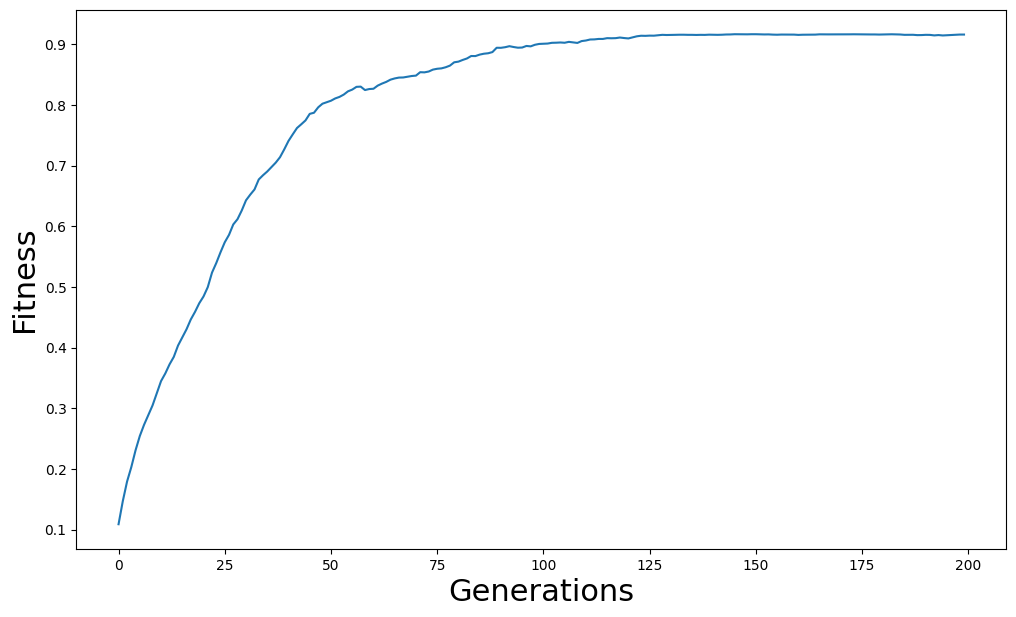

In [82]:
num_generations = 200
population_size = 900
str_len = len(target)
mutation_rate = 0.0001

pop_fit = []
pop = spawn_population(size=population_size, length=str_len) # 초기 개체군을 생성한다
done = False

start = time.time()
for gen in range(num_generations):
    print(f"Gen {gen}")
    pop, avg_fit = evaluate_population(pop, target)
    pop_fit.append(avg_fit) # 현재 개체군 내 모든 개체들의 적합도를 합한다
    new_pop = next_generation(pop, size=population_size, length=str_len, mut_rate=mutation_rate) # 새로운 자손 개체군을 생성한다
    pop = new_pop
    for x in pop:
        if x.string == target:
            print("Target Found!!!")
            print(x.string)
            done = True
            break
    if done:
        break
print(f"running time: {(time.time() - start)/60:.4f} min")

pop.sort(key=lambda x: x.fitness, reverse=True)
print(f"final population : {pop[0].string}")

plt.figure(figsize=(12, 7))
plt.xlabel("Generations", fontsize=22)
plt.ylabel("Fitness", fontsize=22)
plt.plot(pop_fit)

In [68]:
''' 실험 '''
a = []
b =[1,2,3,4,5,6]
c = [7,8,9,10,11,12]
a.extend([*b, *c])
print(a)
b += [7,8,9]
print(b)
c += "a"
print(c)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[7, 8, 9, 10, 11, 12, 'a']


In [83]:
import random
import numpy as np
from matplotlib import pyplot as plt
from difflib import SequenceMatcher # difflib는 파이썬 내장 모듈이다
import time

alphabet = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ,.! " # 개체를 구성하는 재료
target = "Hello World!" # 진화를 통해 개체들이 도달해야 하는 최종 목표

def similar(a, b):
    '''
    SequenceMatcher는 유연한(flexible) 클래스로 sequence 내부 원소들이 hashable하는 한, 어떤 자료형의 sequence든 상관없이 sequence쌍 비교를 위한 것이다
    ratio() 메서드는 sequence들 간 유사성의 정도를 [0, 1]범위 안의 float형 값으로 반환한다
    유사성을 측정하는 방법은 아래와 같다
    T = 양쪽 sequence들 내 모든 원소들의 개수(2개의 sequence의 길이가 각각 4, 6이라고 한다면 T는 10이 된다)
    M = 양쪽 sequence들 비교했을 때 일치하는 것의 개수
    유사성 = (2.0 * M) / T # M에 2.0을 곱하는 것은 애초에 T가 두 sequence 내 모든 원소들의 개수를 의미하고 있으며, 따라서 일치하는 원소의 개수도 각 sequence마다 별도로 세기 때문이다
    유사성 = 1.0 --> 두 sequence가 완전히 일치하는 이상적인 상황 / 유사성 = 0.0 --> 두 sequence가 전혀 일치하지 않는 상황
    '''
    return SequenceMatcher(None, a, b).ratio() # 두 문자열 간 유사도를 비율(확률)로 반환한다

# 초기 개체군 생성
def spawn_population(length=26, size=100):
    # length : 개체의 크기(문자열의 길이), size : 개체군의 크기
    pop = [] # 개체군
    for i in range(size):
        string = ''.join(random.choices(alphabet, k=length)) # alphabet에서 k개의 문자를 중복을 허용하여(with replacement) 무작위로 k개를 추출한다
        pop.append({"string":string, "fitness":0}) # 개체 생성

    return pop

def recombine(p1, p2):
    cross_pt = random.randint(0, len(p1)) # [0, len(p1)] 구간에서 무작위 정수 하나를 반환한다
    child1 = {"string":"".join([*p1["string"][0:cross_pt], *p2["string"][cross_pt:]]), "fitness":0}
    child2 = {"string":"".join([*p2["string"][0:cross_pt], *p1["string"][cross_pt:]]), "fitness":0}

    return child1, child2

def mutate(x, mut_rate=0.01):
    new_x = [] # 변이된 개체를 담는 변수
    for char in x["string"]:
        if random.random() < mut_rate: # [0.0, 1.0] 사이의 무작위 정수값을 추출하여 그것이 변이율보다 작으면 변이가 일어난다
            new_x += random.choices(alphabet, k=1) # random.choices()에서 반환되는 것은 원소가 1개인 리스트이다
        else:
            new_x += char
    x["string"] = "".join(new_x)
    
    return x

def evaluate_population(pop, target):
    avg_fit = 0
    for i in range(len(pop)):
        fit = similar(pop[i]["string"], target) # 개체와 최종 목표 간 유사도를 계산한다
        pop[i]["fitness"] = fit
        avg_fit += fit
    avg_fit /= len(pop) # 개체군의 적합도 평균을 계산한다

    return pop, avg_fit

def next_generation(pop, size=100, length=26, mut_rate=0.01):
    new_pop = []
    while len(new_pop) < size:
        parents = random.choices(pop, k=2, weights=[x["fitness"] for x in pop]) # 부모가 될 적합한 개체 2개를 선택한다(이 때 동일한 개체가 2번 선택될 수 있다)
        offspring = recombine(parents[0], parents[1]) # 2개의 자손 개체를 생성한다
        new_pop.extend([mutate(offspring[0], mut_rate=mut_rate), mutate(offspring[1], mut_rate=mut_rate)]) # 각 자손에 대해 변이를 수행한다

    return new_pop

Gen 0
Gen 1
Gen 2
Gen 3
Gen 4
Gen 5
Gen 6
Gen 7
Gen 8
Gen 9
Gen 10
Gen 11
Gen 12
Gen 13
Gen 14
Gen 15
Gen 16
Gen 17
Gen 18
Gen 19
Gen 20
Gen 21
Gen 22
Gen 23
Gen 24
Gen 25
Gen 26
Gen 27
Gen 28
Gen 29
Gen 30
Gen 31
Gen 32
Gen 33
Gen 34
Gen 35
Gen 36
Gen 37
Gen 38
Gen 39
Gen 40
Gen 41
Gen 42
Gen 43
Gen 44
Gen 45
Gen 46
Gen 47
Gen 48
Gen 49
Gen 50
Gen 51
Gen 52
Gen 53
Gen 54
Gen 55
Gen 56
Gen 57
Gen 58
Gen 59
Gen 60
Gen 61
Gen 62
Gen 63
Gen 64
Gen 65
Gen 66
Gen 67
Gen 68
Gen 69
Gen 70
Gen 71
Gen 72
Gen 73
Gen 74
Gen 75
Gen 76
Gen 77
Gen 78
Gen 79
Gen 80
Gen 81
Gen 82
Gen 83
Gen 84
Gen 85
Gen 86
Gen 87
Gen 88
Gen 89
Gen 90
Gen 91
Gen 92
Gen 93
Gen 94
Gen 95
Gen 96
Gen 97
Gen 98
Gen 99
Gen 100
Gen 101
Gen 102
Gen 103
Gen 104
Gen 105
Gen 106
Gen 107
Gen 108
Gen 109
Gen 110
Gen 111
Gen 112
Gen 113
Gen 114
Gen 115
Gen 116
Gen 117
Gen 118
Gen 119
Gen 120
Gen 121
Gen 122
Gen 123
Gen 124
Gen 125
Gen 126
Gen 127
Gen 128
Gen 129
Gen 130
Gen 131
Gen 132
Gen 133
Gen 134
Gen 135
Gen 136
Gen 137
Gen 13

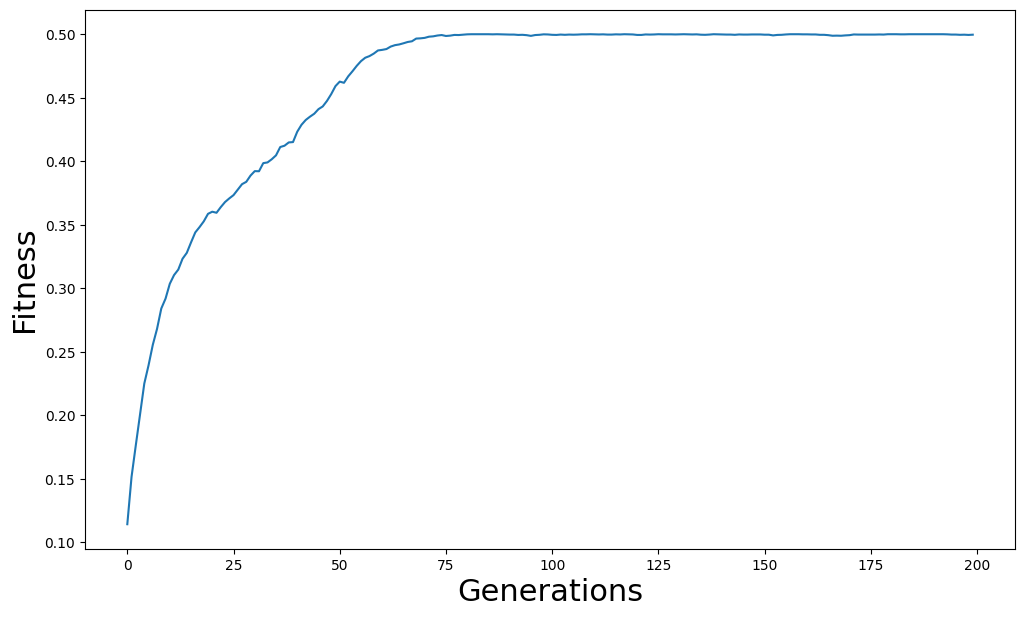

In [85]:
num_generations = 200
population_size = 900 # 개체군 내 개체의 수
str_len = len(target)
mutation_rate = 0.0001 # 변이 확률은 0.01%로 설정한다

pop_fit = []
pop = spawn_population(size=population_size, length=str_len) # 초기 개체군을 생성한다
done = False

start = time.time()
for gen in range(num_generations):
    print(f"Gen {gen}")
    pop, avg_fit = evaluate_population(pop, target)
    pop_fit.append(avg_fit) # 현재 개체군 내 모든 개체들의 적합도를 합한다
    new_pop = next_generation(pop, size=population_size, length=str_len, mut_rate=mutation_rate) # 새로운 자손 개체군을 생성한다
    for x in new_pop:
        if x["string"] == target:
            print("Target Found!!!")
            done = True
            break
    if done:
        break
    pop = new_pop
print(f"running time: {(time.time() - start)/60:.4f} min")

pop.sort(key=lambda x: x["fitness"], reverse=True)
print(f"final population : {pop[0]["string"]}")

plt.figure(figsize=(12, 7))
plt.xlabel("Generations", fontsize=22)
plt.ylabel("Fitness", fontsize=22)
plt.plot(pop_fit)

In [9]:
import torch
from torch import nn

class test_model(nn.Module):
    def __init__(self, input_size, node, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, node)
        self.layer2 = nn.Linear(node, node)
        self.layer3 = nn.Linear(node, output_size)
    def forward(self, x):
        output = self.layer1(x)
        output = self.layer2(x)
        output = self.layer3(x)

        return output

model = test_model(6, 128, 10)
print(model)
# dir(model)
print(model.layer1)
# dir(model.layer1)
# print(model.layer1.weight, len(model.layer1.weight))
print(model.layer1.weight[0])
# print(model.layer1.bias, len(model.layer1.bias))
print(model.layer1.bias[0])

test_model(
  (layer1): Linear(in_features=6, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=10, bias=True)
)
Linear(in_features=6, out_features=128, bias=True)
tensor([ 0.0882,  0.3410, -0.2897,  0.1745, -0.0812, -0.3975],
       grad_fn=<SelectBackward0>)
tensor(0.2452, grad_fn=<SelectBackward0>)


In [20]:
len(list(model.parameters()))
# model.layer1.weight[0][0] = 0.0792

6

In [31]:
model.state_dict()["layer1.weight"][0][0].copy_(0.0997)

tensor(0.0997)

In [32]:
model.state_dict()["layer1.weight"][0]

tensor([ 0.0997,  0.3410, -0.2897,  0.1745, -0.0812, -0.3975])